In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('student_scores.csv')
data.head()

Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30

In [26]:
data.shape

(25, 2)

In [27]:
data.describe()

Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000

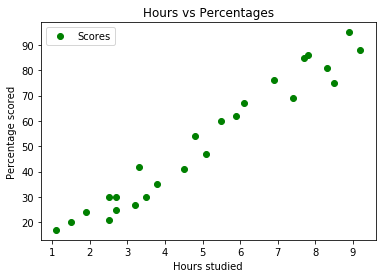

In [28]:
#Let's see what or data is saying
data.plot(x='Hours', y='Scores', c='g', style='o')
plt.xlabel('Hours studied')
plt.ylabel('Percentage scored')
plt.title('Hours vs Percentages')
plt.show()

The next step is to divide or data into Attributes and Labels. 
Attributes are the independent variables while labels are dependent variables whose values are to be predicted

In [4]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [5]:
print(x[:5])

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]]


In [6]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


Now that we have our attributes and labels, the next step is to split this data into training and test sets. 
We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [89]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [77]:
#To retrieve the intercept
print(regressor.intercept_)

2.018160041434683


In [78]:
#To retrieve the slope
print(regressor.coef_)

[9.91065648]


This means that for every one unit of change in hours studied, the change in the score is about 9.91%. Or in simpler words, 
if a student studies one hour more than they previously studied for an exam, 
they can expect to achieve an increase of 9.91% in the score achieved by the student previously.

In [79]:
y_pred = regressor.predict(x_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [82]:
prediction = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
prediction

Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033

In [85]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


You can see that the value of root mean squared error is 4.64, which is less than 10% of the mean value of the percentages of all the students i.e. 51.48. 
This means that our algorithm did a decent job.